In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score,StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import seaborn as sns

In [30]:

df = pd.read_excel('C:\\Users\\Minfy\\OneDrive - MINFY TECHNOLOGIES PRIVATE LIMITED\\Desktop\\class Assign\\Bank_Personal_Loan_Modelling.xlsx',sheet_name='Data')

In [31]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [32]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [33]:
df.shape

(5000, 14)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [35]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [37]:
df.drop(columns=["ID", "ZIP Code"], inplace=True)

In [39]:
numerical_cols = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
numerical_cols

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [41]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,-1.774417,-1.666078,-0.538229,4,-0.193371,1,-0.555524,0,1,0,0,0
1,-0.029524,-0.096330,-0.864109,3,-0.250595,1,-0.555524,0,1,0,0,0
2,-0.552992,-0.445163,-1.363793,1,-0.536720,1,-0.555524,0,0,0,0,0
3,-0.901970,-0.968413,0.569765,1,0.436103,2,-0.555524,0,0,0,0,0
4,-0.901970,-1.055621,-0.625130,4,-0.536720,2,-0.555524,0,0,0,0,1


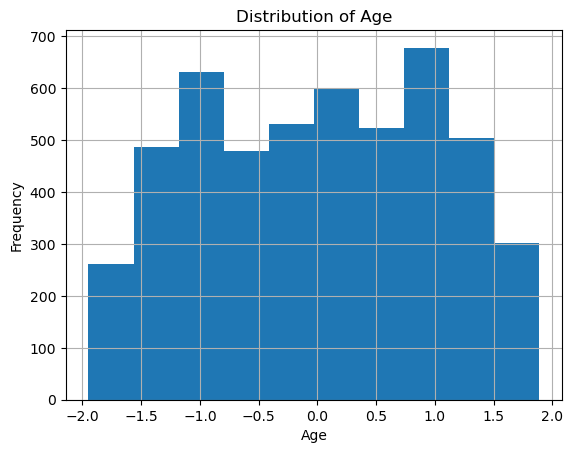

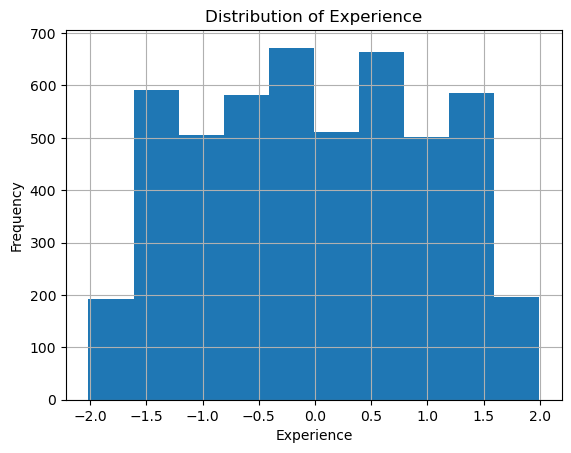

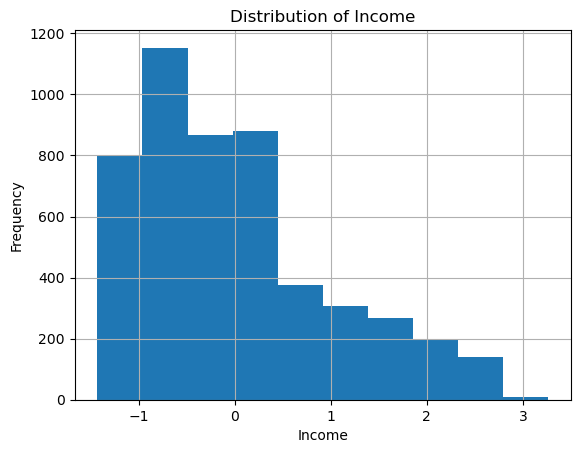

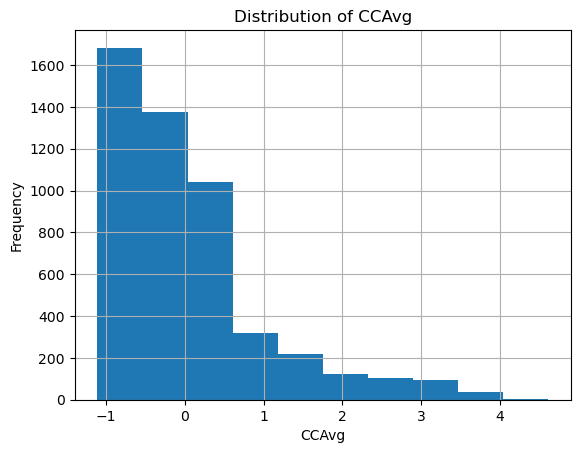

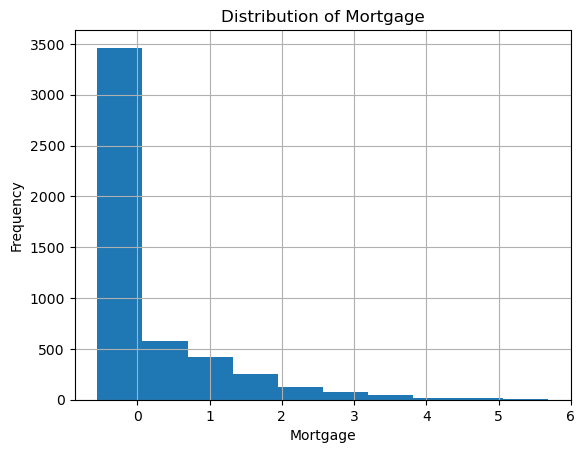

In [42]:
import matplotlib.pyplot as plt
numeric_cols = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
for col in numeric_cols:
    plt.figure()
    df[col].hist()
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [105]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


In [106]:
numerical_columns = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
for col in numerical_columns:
    df = remove_outliers(df, col)

In [107]:
def univariate_analysis(df, dataset_name):
    numerical_columns = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
    categorical_columns = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
    
    print(f"\nUnivariate Analysis ({dataset_name}):")
    
    # Numerical features
    print("\nNumerical Features Summary:")
    print(df[numerical_columns].describe().to_string())
    
    for col in numerical_columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col} ({dataset_name})')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
    
    # Categorical features
    print("\nCategorical Features Value Counts:")
    for col in categorical_columns:
        print(f"\n{col}:")
        print(df[col].value_counts().to_string())
        
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, data=df)
        plt.title(f'Count of {col} ({dataset_name})')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

In [108]:
def bivariate_analysis(df, dataset_name):
    numerical_columns = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
    categorical_columns = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
    
    print(f"\nBivariate Analysis ({dataset_name}):")
    
    # Numerical features vs Personal Loan
    for col in numerical_columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Personal Loan', y=col, data=df)
        plt.title(f'{col} by Personal Loan ({dataset_name})')
        plt.xlabel('Personal Loan (0 = No, 1 = Yes)')
        plt.ylabel(col)
        plt.show()
      
        
        plt.figure(figsize=(10, 6))
        sns.violinplot(x='Personal Loan', y=col, data=df)
        plt.title(f'{col} by Personal Loan (Violin Plot) ({dataset_name})')
        plt.xlabel('Personal Loan (0 = No, 1 = Yes)')
        plt.ylabel(col)
        plt.show()
    
    # Categorical features vs Personal Loan
    for col in categorical_columns:
        plt.figure(figsize=(10, 6))
        pd.crosstab(df[col], df['Personal Loan'], normalize='index').plot(kind='bar', stacked=True)
        plt.title(f'{col} vs Personal Loan ({dataset_name})')
        plt.xlabel(col)
        plt.ylabel('Proportion')
        plt.legend(title='Personal Loan', labels=['No', 'Yes'])
        plt.show()


In [109]:
def multivariate_analysis(df, dataset_name):
    # Correlation heatmap
    plt.figure(figsize=(12, 8))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title(f'Correlation Heatmap ({dataset_name})')
    plt.show()
    # Pair plot for key numerical features
    key_features = ['Income', 'CCAvg', 'Mortgage', 'Personal Loan']
    sns.pairplot(df[key_features], hue='Personal Loan', diag_kind='kde')
    plt.suptitle(f'Pair Plot of Key Features ({dataset_name})', y=1.02)
    plt.show()
    
    print(f"\nMultivariate Analysis ({dataset_name}):")
    print("\nCorrelation with Personal Loan:")
    print(correlation_matrix['Personal Loan'].sort_values(ascending=False).to_string())


Univariate Analysis (With Out Outliers):

Numerical Features Summary:
               Age   Experience       Income        CCAvg     Mortgage
count  4050.000000  4050.000000  4050.000000  4050.000000  4050.000000
mean      0.015327     0.012476    -0.312853    -0.277550    -0.241904
std       1.007391     1.008284     0.721000     0.600915     0.574236
min      -1.948906    -2.014911    -1.428969    -1.108969    -0.555524
25%      -0.901970    -0.881204    -0.885835    -0.765619    -0.555524
50%       0.057721    -0.009122    -0.451327    -0.345970    -0.555524
75%       0.930168     0.862960     0.156983     0.092754    -0.555524
max       1.889859     1.996667     1.742936     1.523376     1.479802


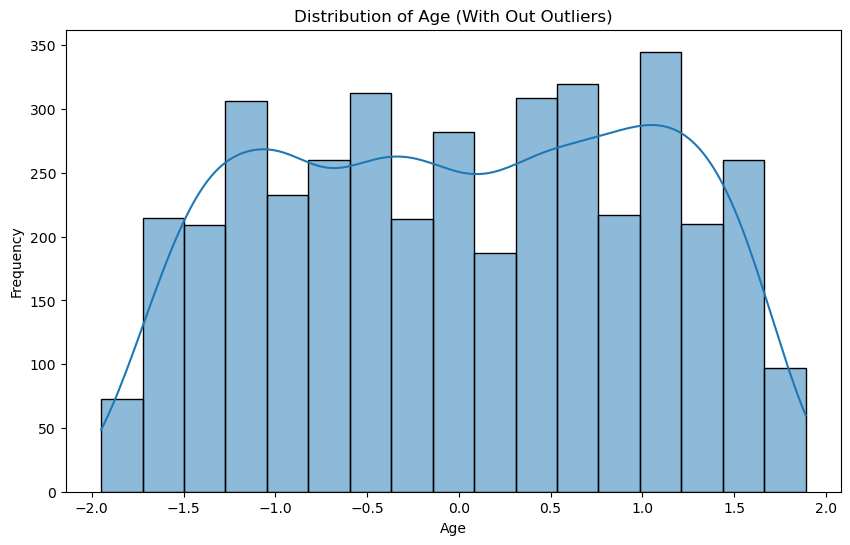

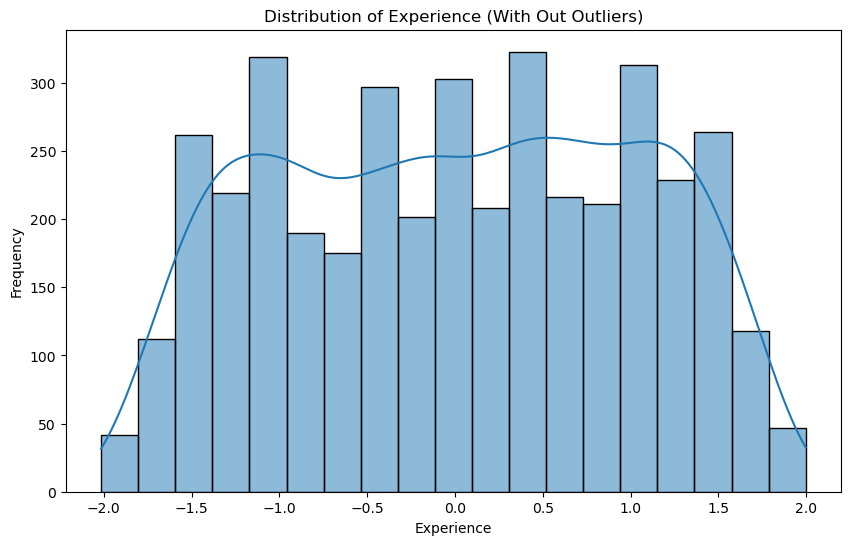

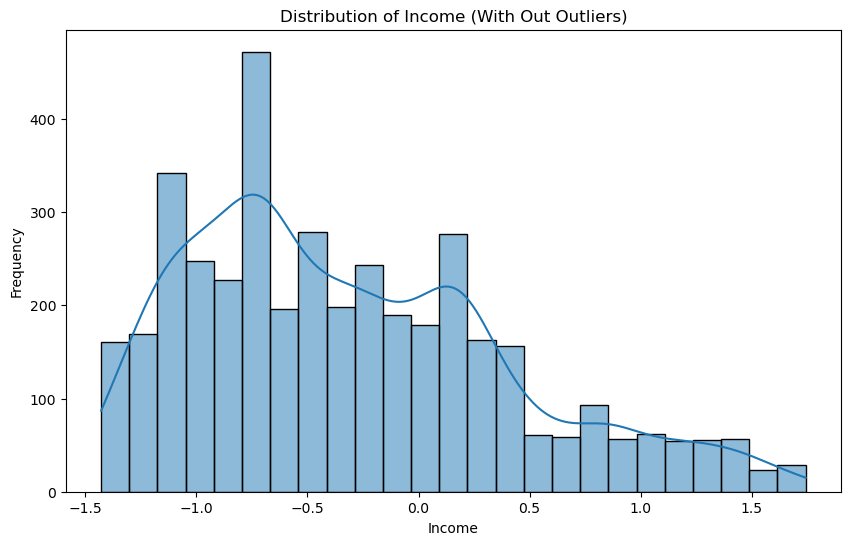

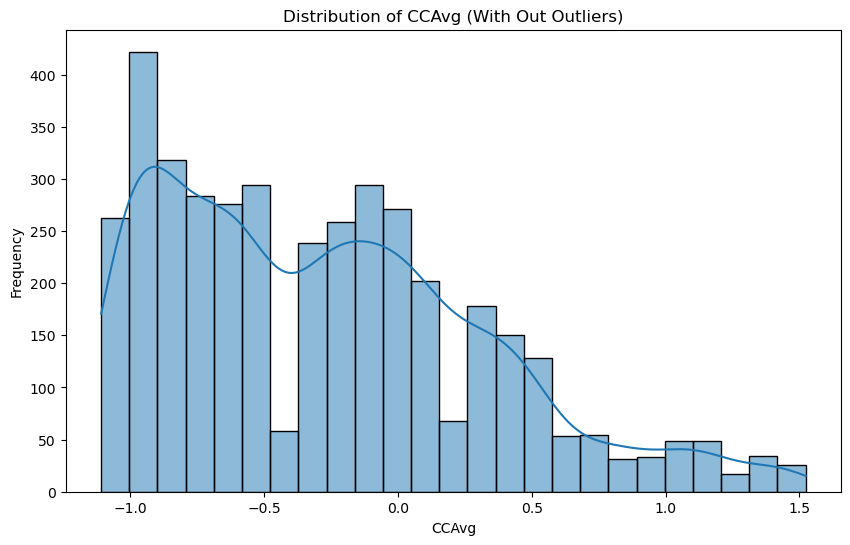

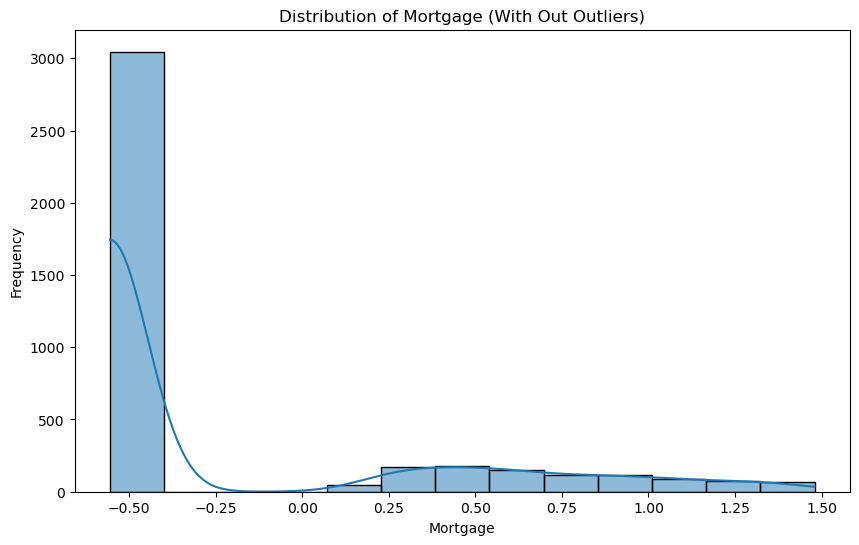


Categorical Features Value Counts:

Family:
Family
1    1135
4    1063
2     979
3     873


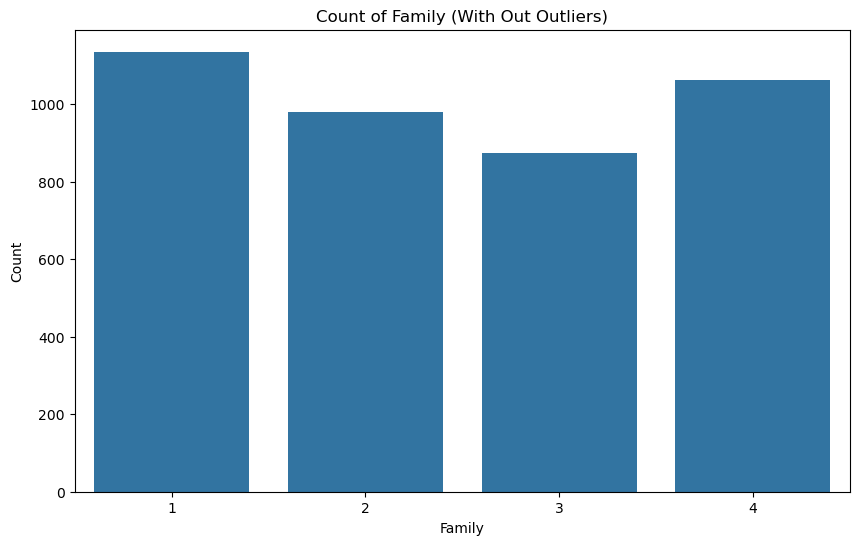


Education:
Education
1    1539
3    1286
2    1225


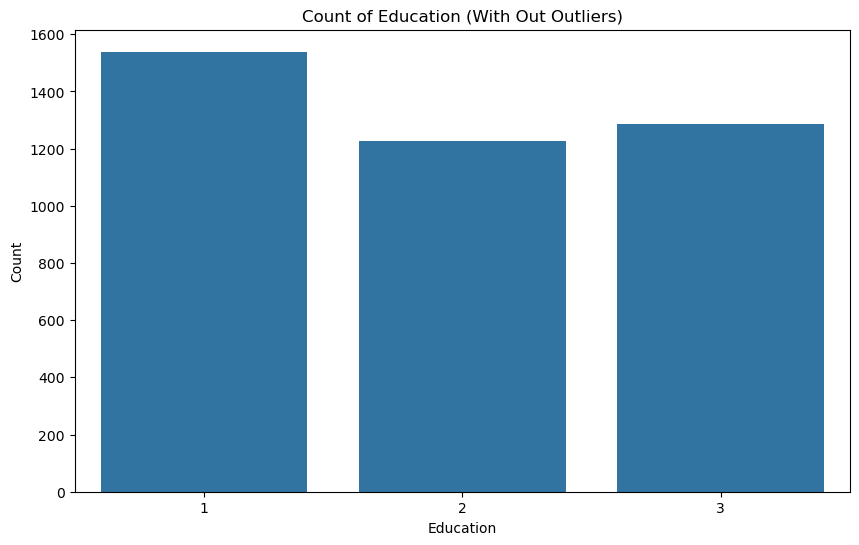


Securities Account:
Securities Account
0    3623
1     427


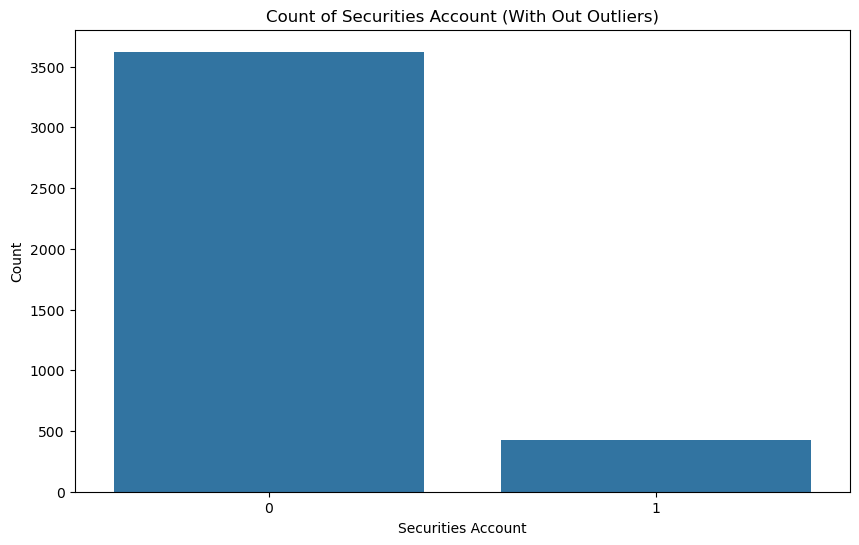


CD Account:
CD Account
0    3884
1     166


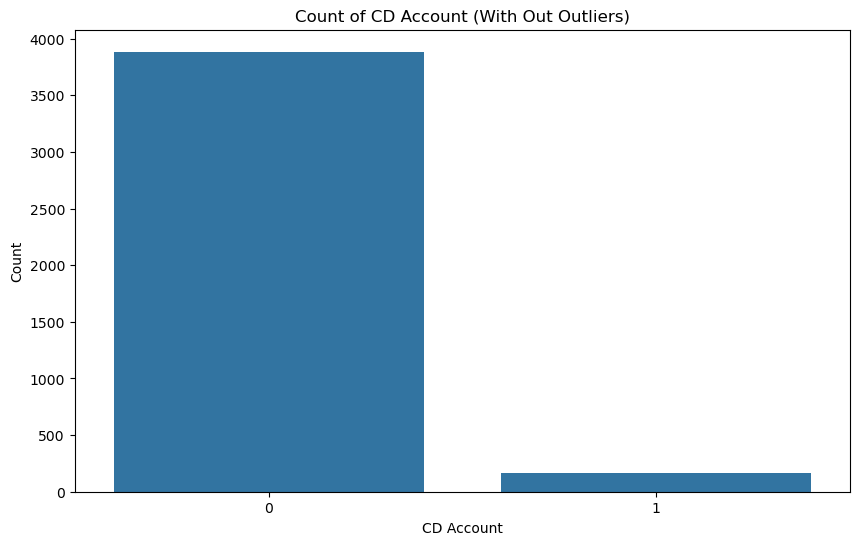


Online:
Online
1    2412
0    1638


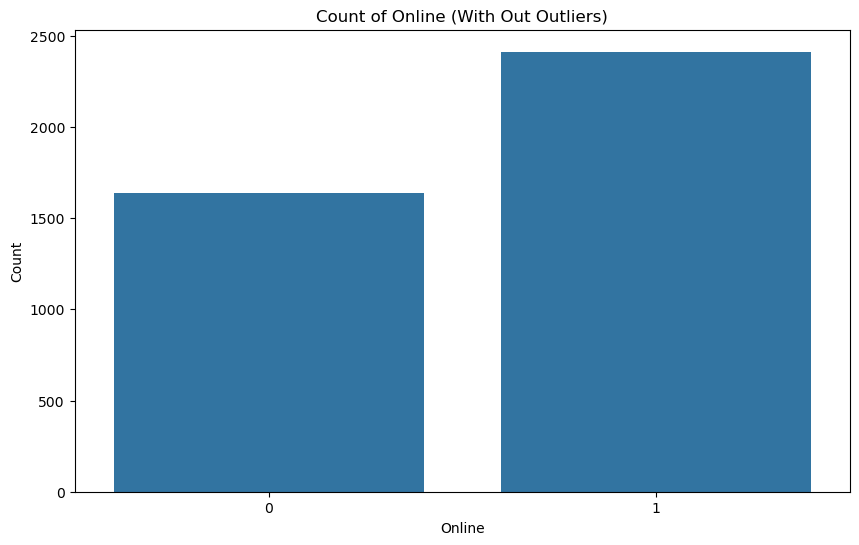


CreditCard:
CreditCard
0    2857
1    1193


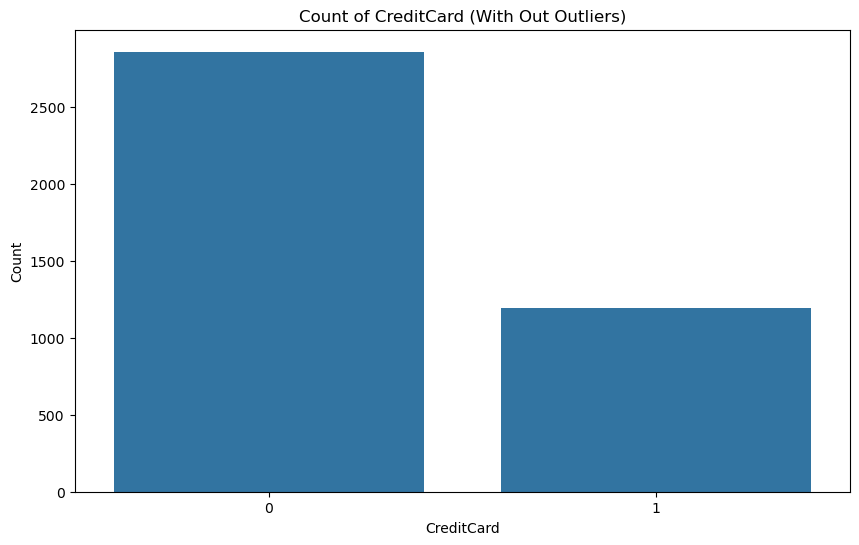


Bivariate Analysis (With Out Outliers):


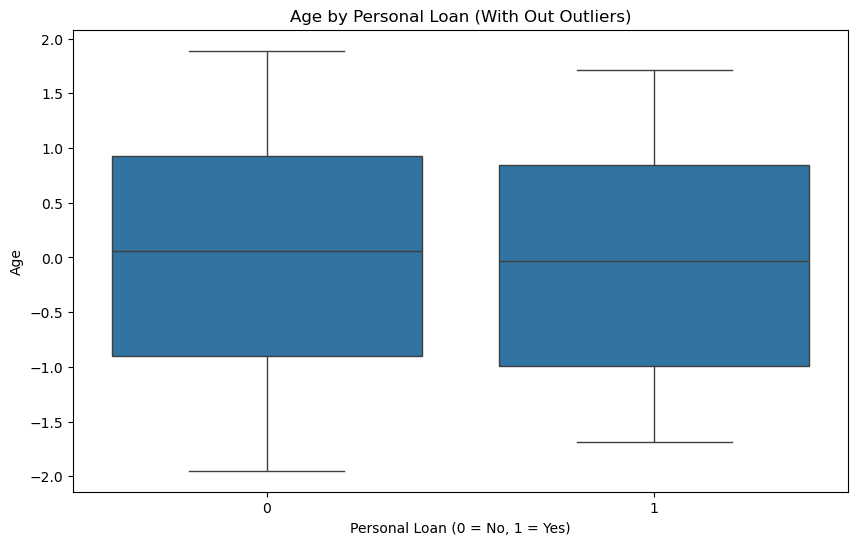

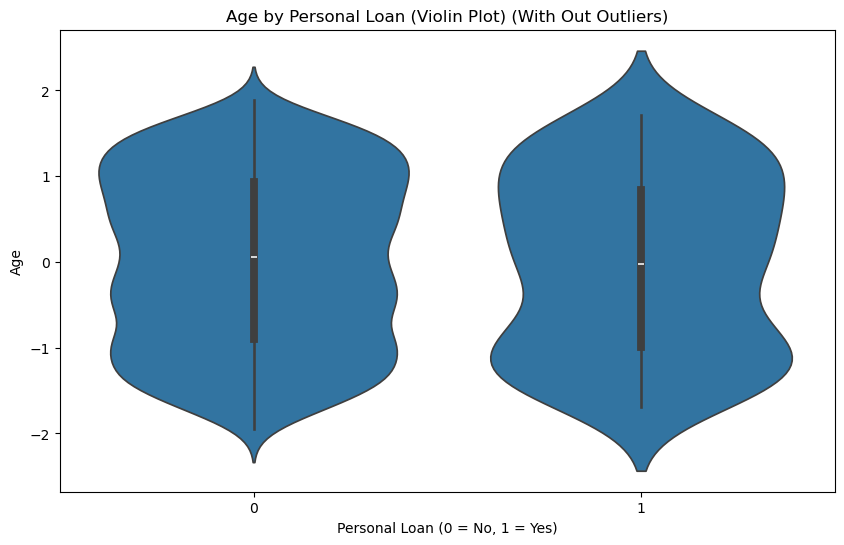

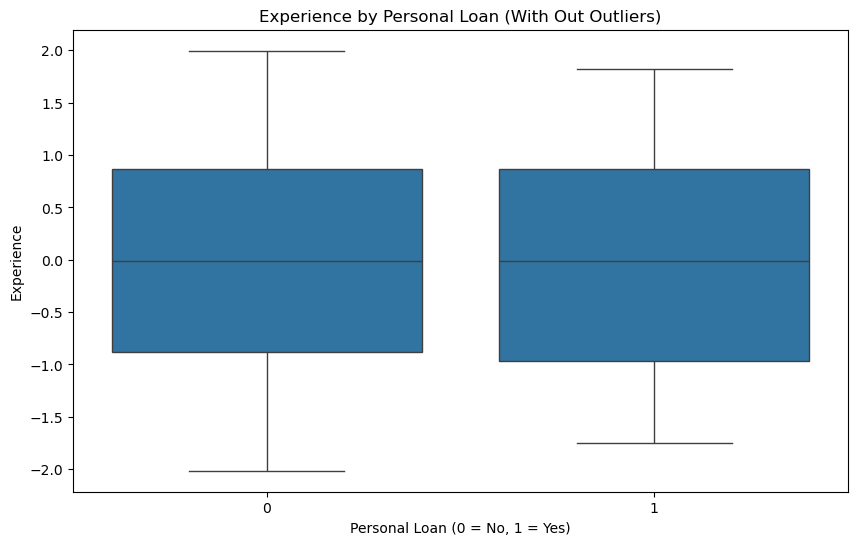

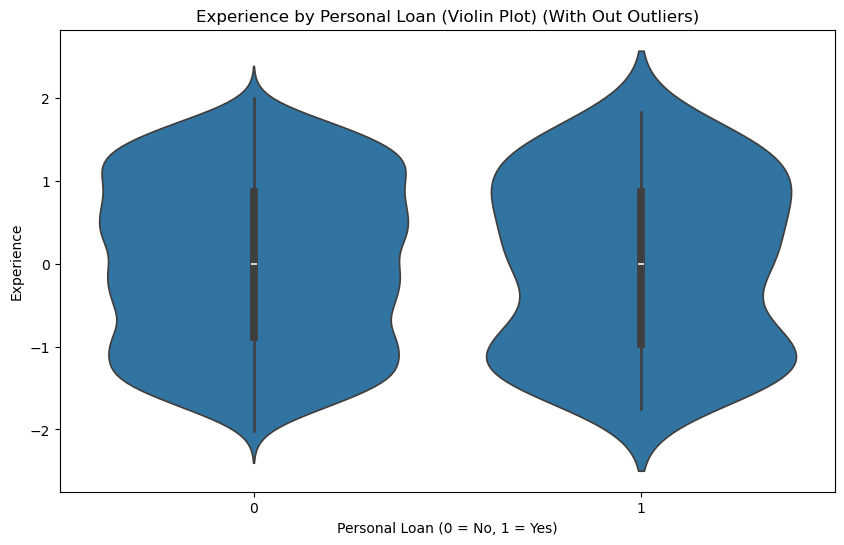

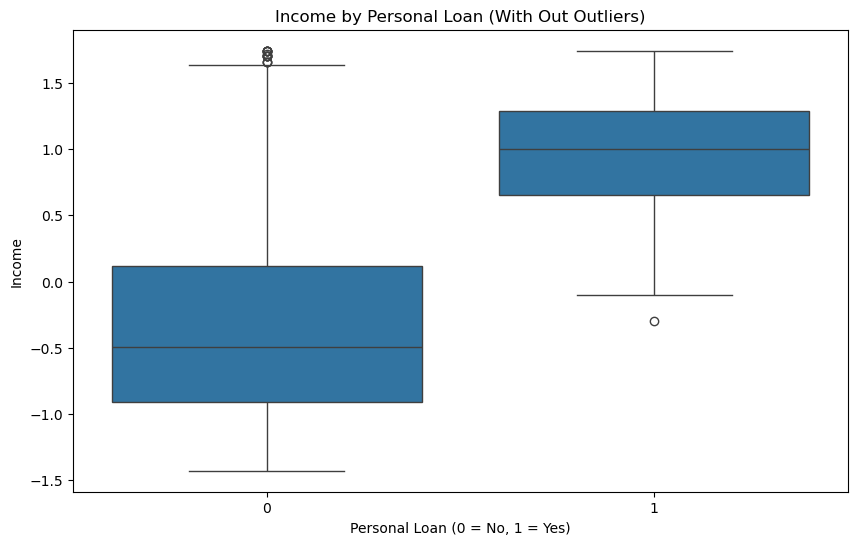

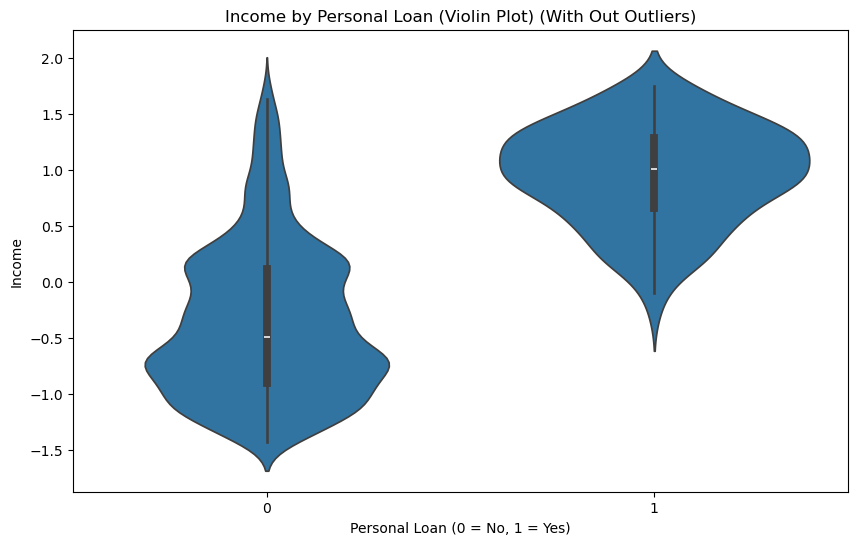

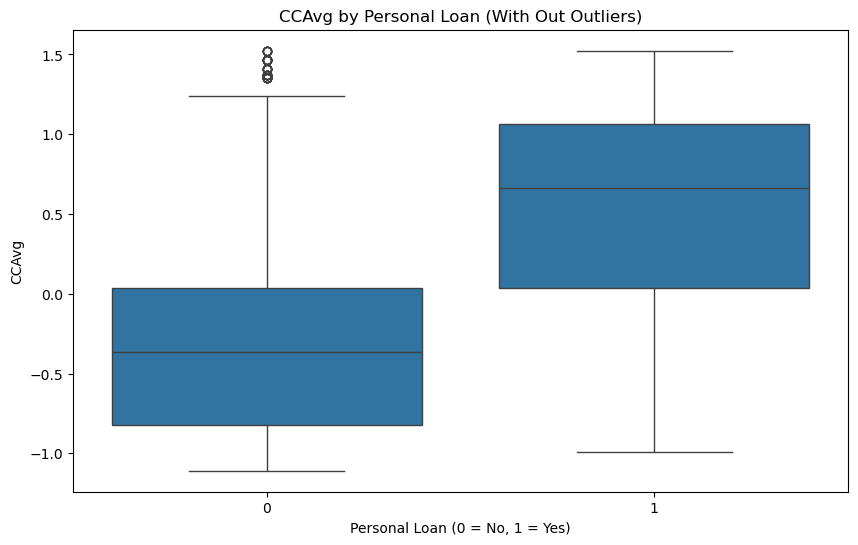

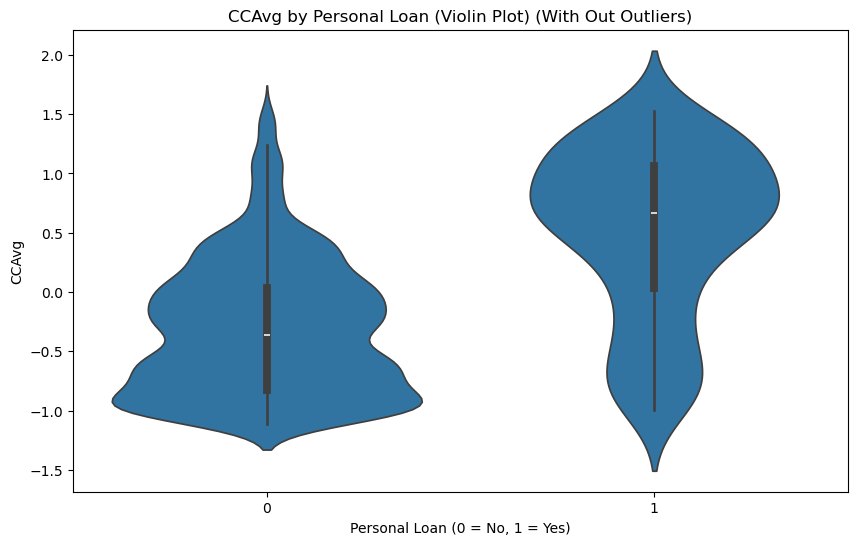

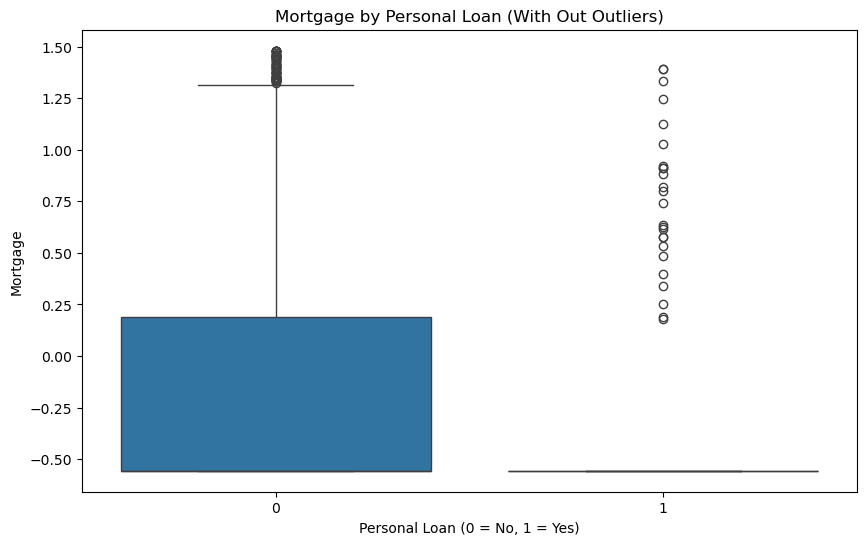

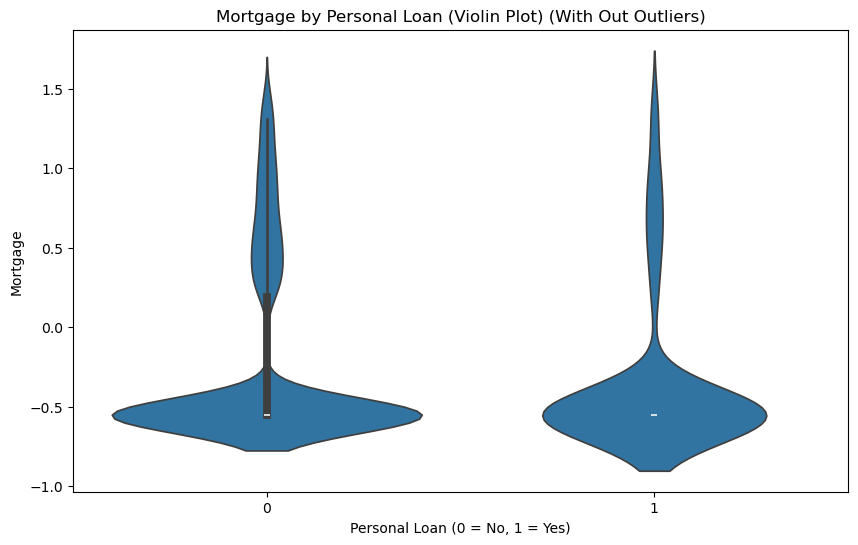

<Figure size 1000x600 with 0 Axes>

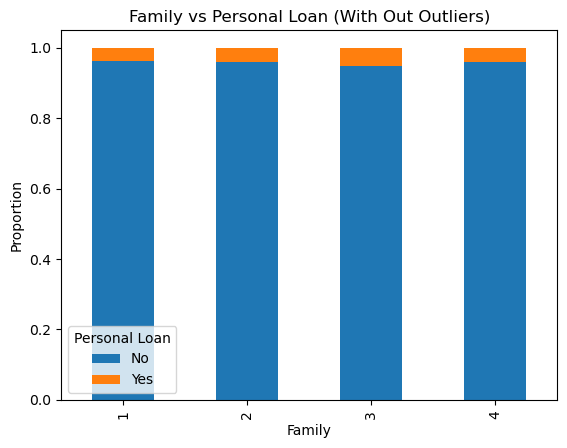

<Figure size 1000x600 with 0 Axes>

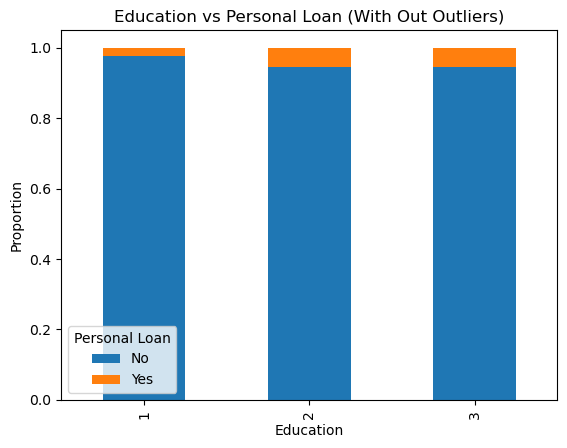

<Figure size 1000x600 with 0 Axes>

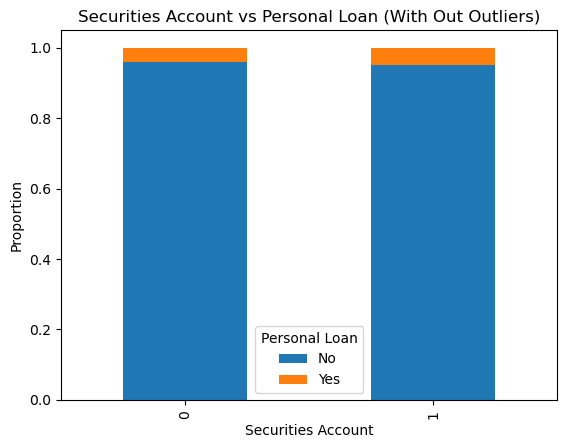

<Figure size 1000x600 with 0 Axes>

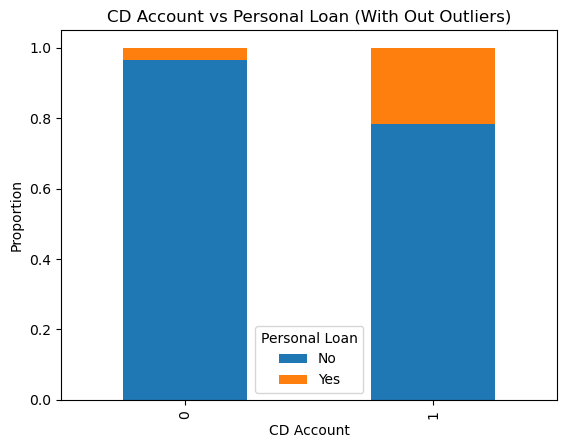

<Figure size 1000x600 with 0 Axes>

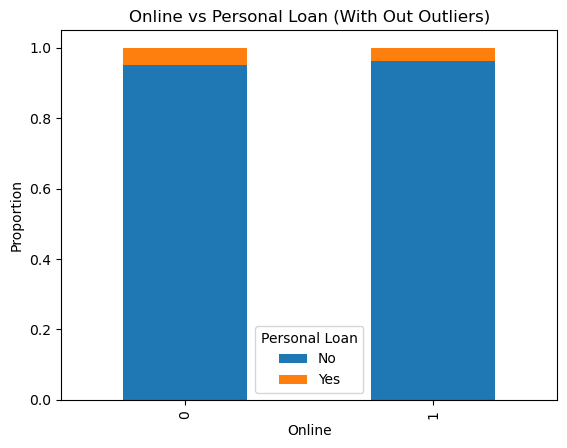

<Figure size 1000x600 with 0 Axes>

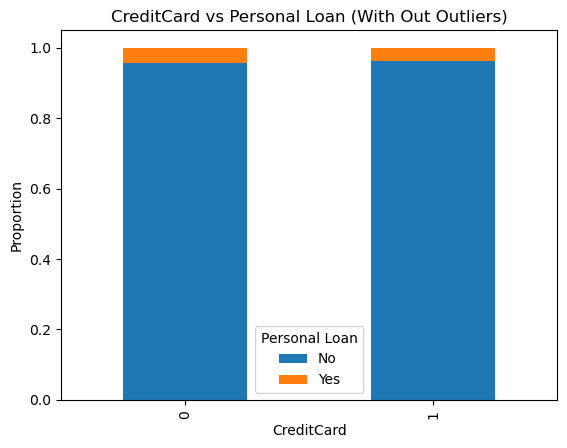

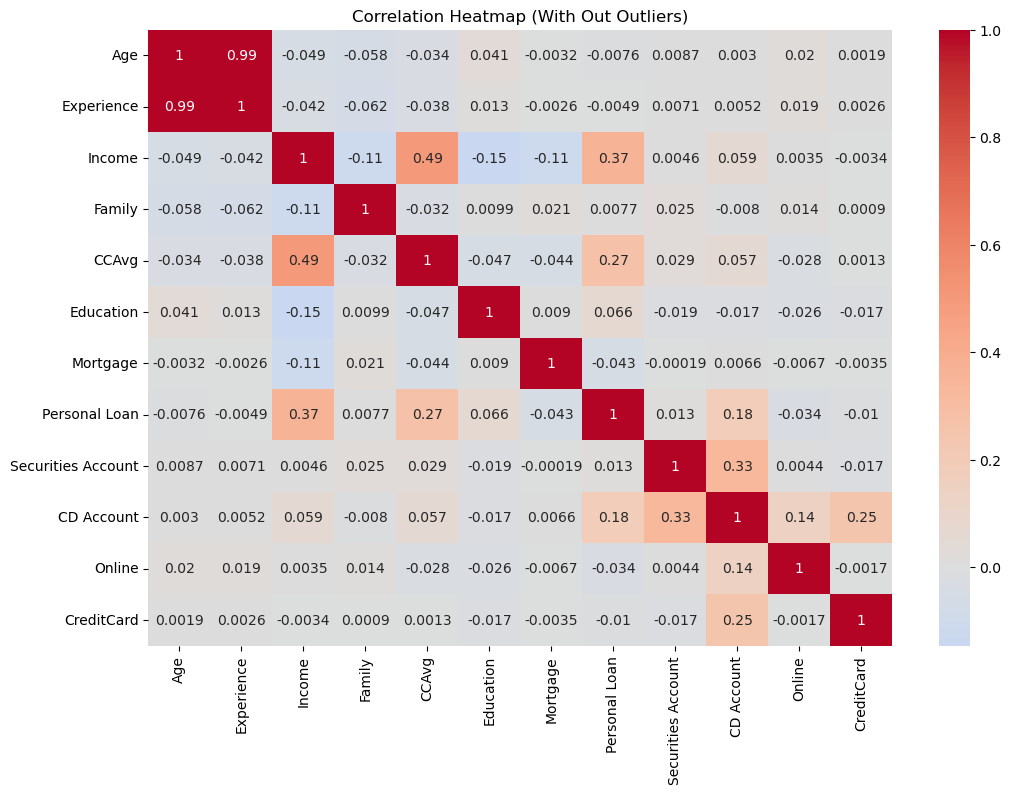

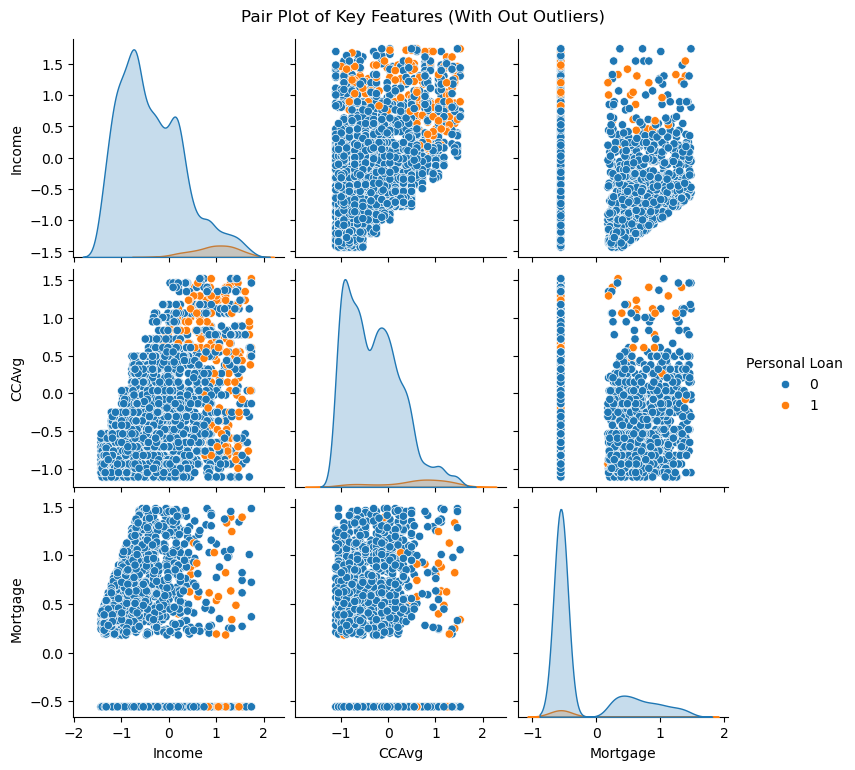


Multivariate Analysis (With Out Outliers):

Correlation with Personal Loan:
Personal Loan         1.000000
Income                0.368158
CCAvg                 0.271415
CD Account            0.181066
Education             0.066060
Securities Account    0.012793
Family                0.007717
Experience           -0.004898
Age                  -0.007580
CreditCard           -0.010244
Online               -0.034339
Mortgage             -0.043463


In [112]:
def analysis():
    univariate_analysis(df,'With Out Outliers')
    bivariate_analysis(df, 'With Out Outliers')
    multivariate_analysis(df, 'With Out Outliers')  

analysis()




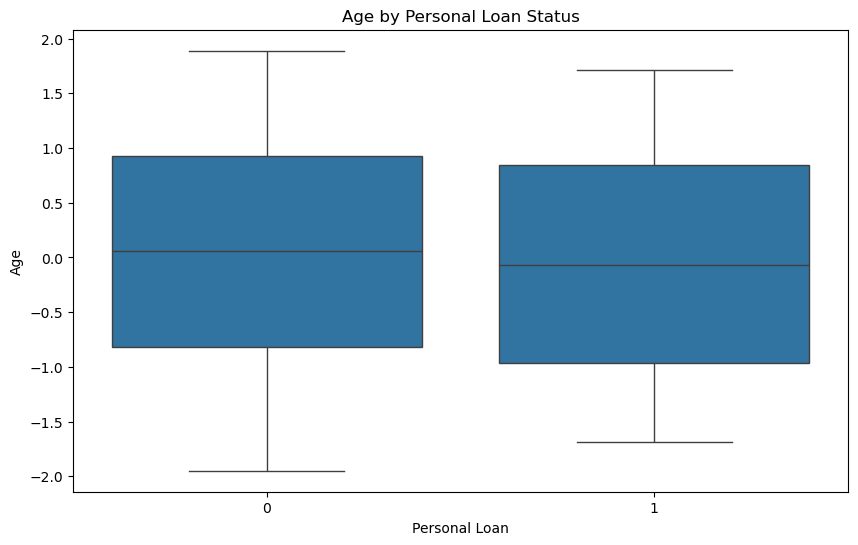

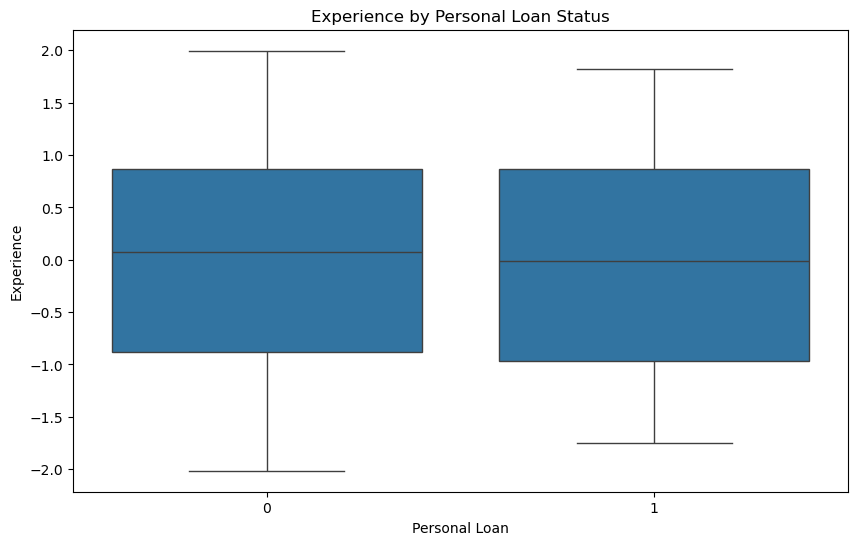

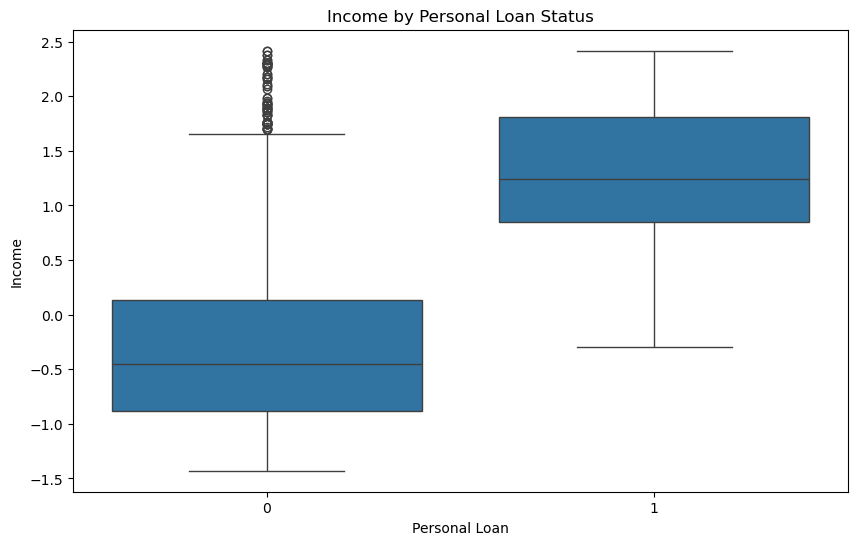

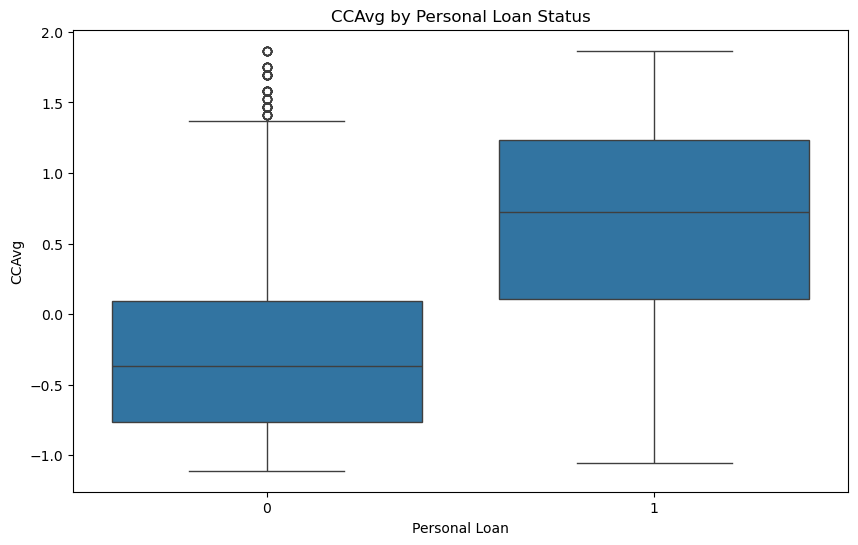

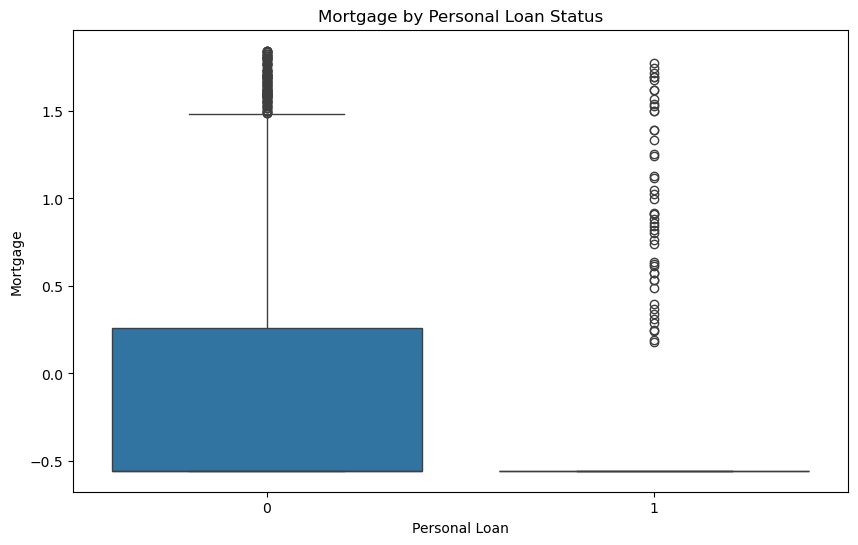

In [64]:

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Personal Loan', y=col, data=df)
    plt.title(f'{col} by Personal Loan Status')
    
    plt.show()

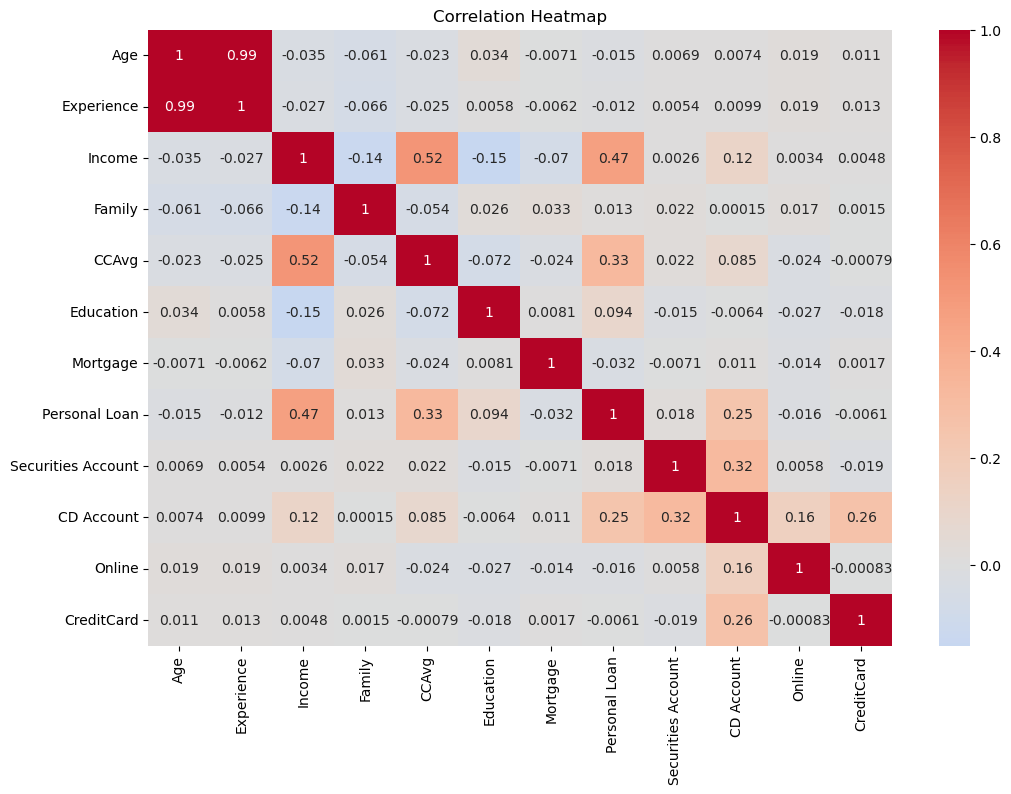

In [62]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')

plt.show()

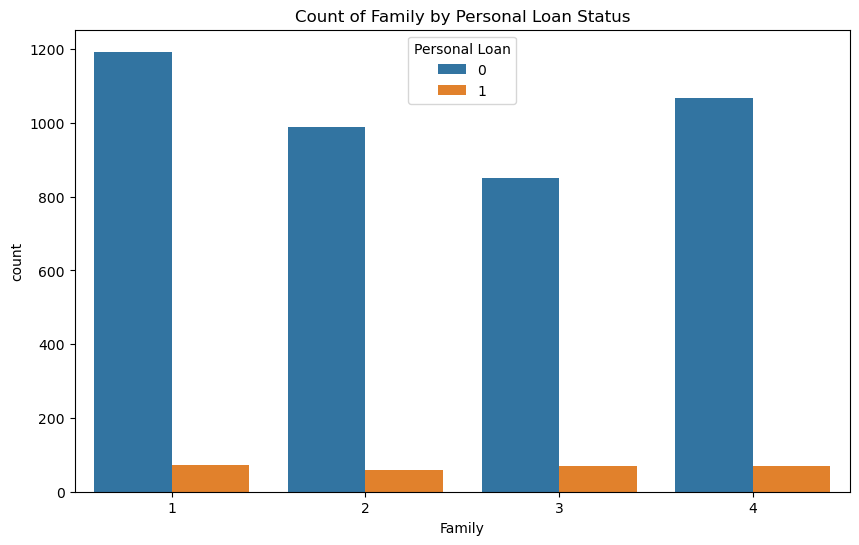

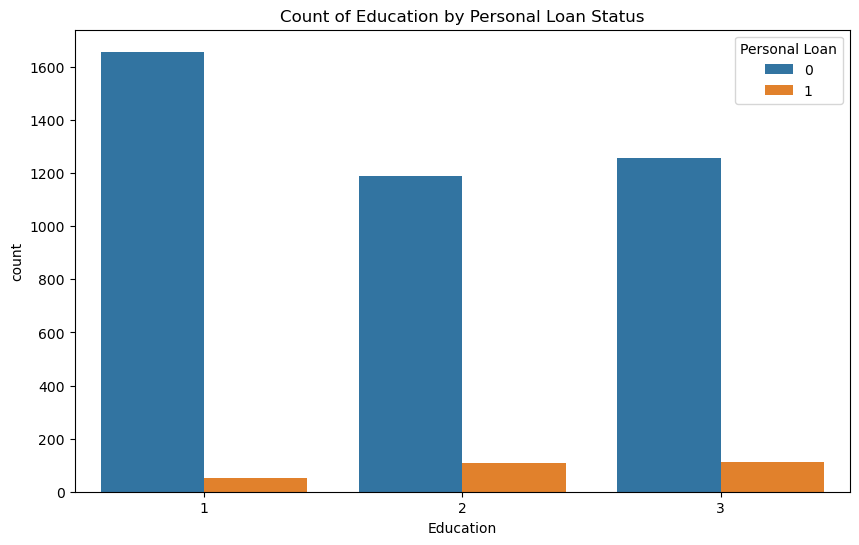

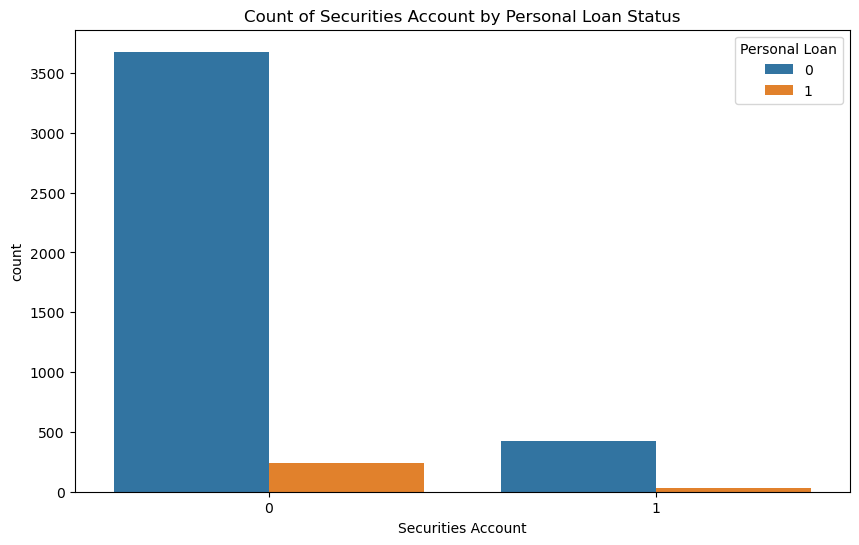

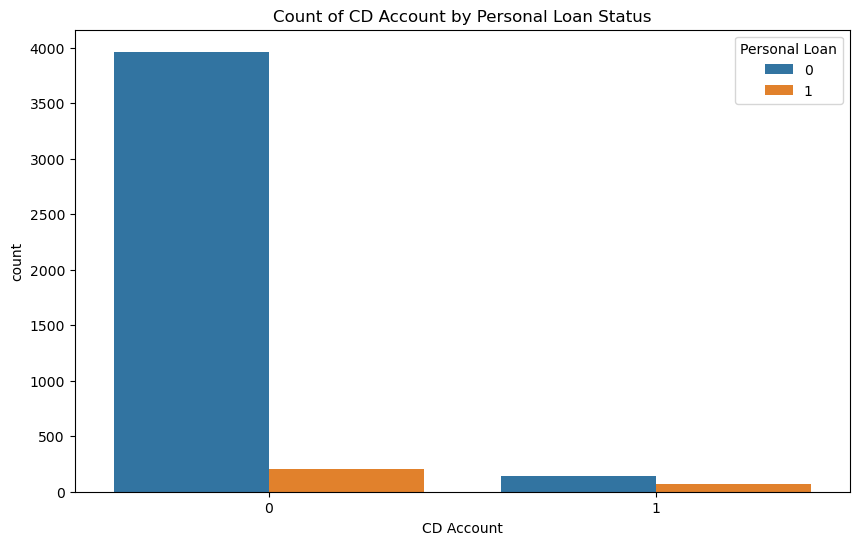

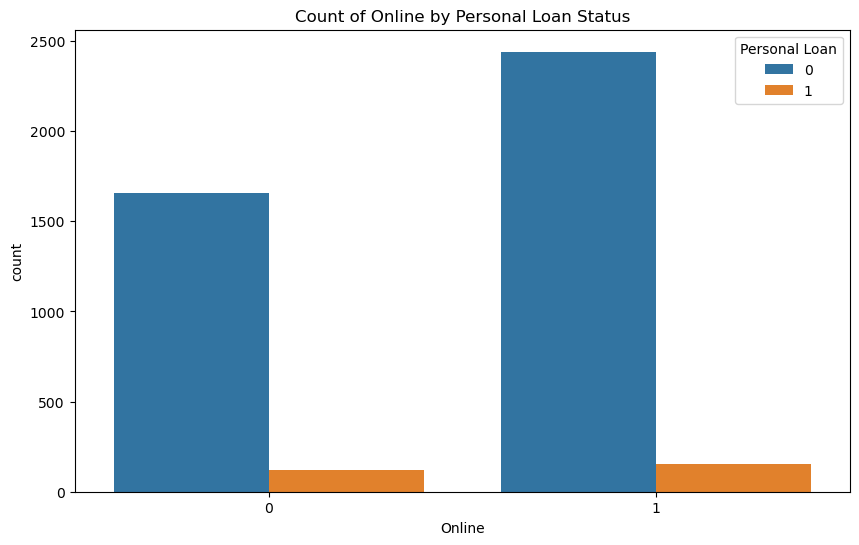

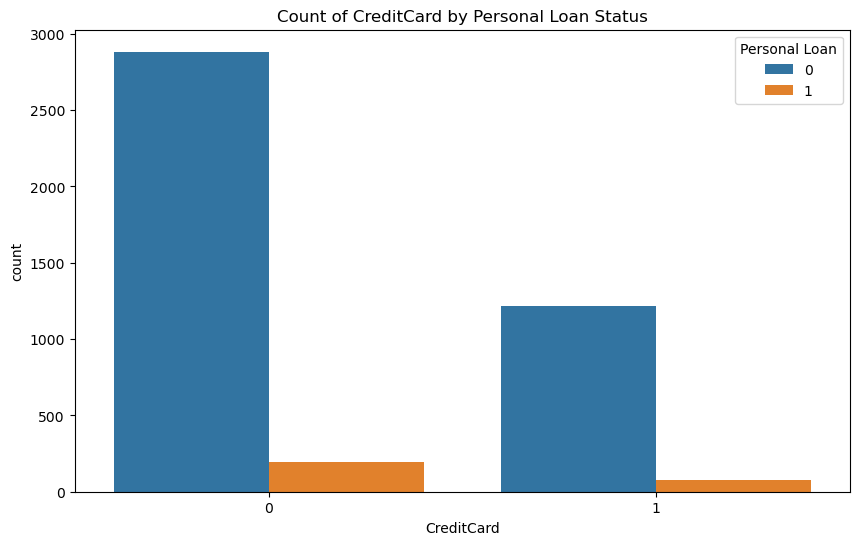

In [61]:
categorical_columns = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Personal Loan', data=df)
    plt.title(f'Count of {col} by Personal Loan Status')
    plt.show()

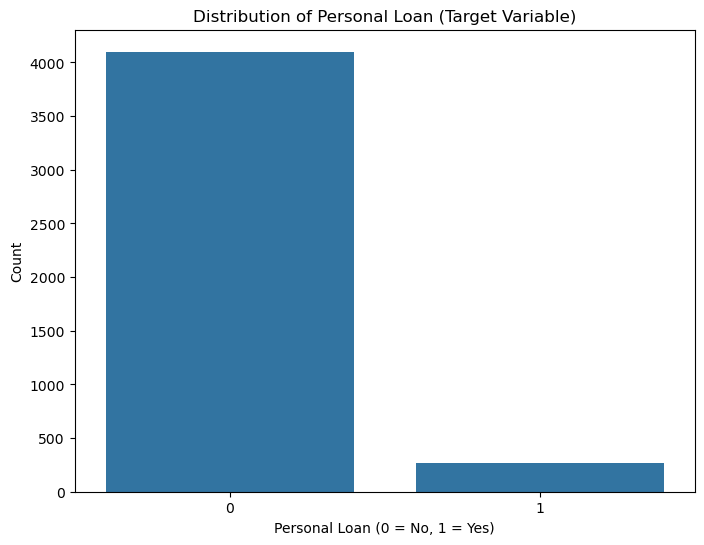

In [65]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Personal Loan', data=df)
plt.title('Distribution of Personal Loan (Target Variable)')
plt.xlabel('Personal Loan (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


In [78]:
# Step 4: Address class imbalance with SMOTE
from imblearn.over_sampling import SMOTE
X_scaled = df[numerical_cols]
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

In [71]:
X = df.drop(['Personal Loan'], axis=1)  # Dropping ID and ZIP Code as they are not predictive
y = df['Personal Loan']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

In [87]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [88]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'), 
                           param_grid, cv=skf, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
models['Random Forest'] = best_rf

In [85]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

In [81]:
results = []
roc_data = {}

In [89]:
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict probabilities for threshold tuning
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Default threshold (0.5)
    y_pred = model.predict(X_test)
    
    # Calculate metrics for default threshold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan
    
    # Perform Stratified K-fold cross-validation for multiple metrics
    cv_accuracy = cross_val_score(model, X_balanced, y_balanced, cv=skf, scoring='accuracy')
    cv_precision = cross_val_score(model, X_balanced, y_balanced, cv=skf, scoring='precision')
    cv_recall = cross_val_score(model, X_balanced, y_balanced, cv=skf, scoring='recall')
    cv_f1 = cross_val_score(model, X_balanced, y_balanced, cv=skf, scoring='f1')
    cv_roc_auc = cross_val_score(model, X_balanced, y_balanced, cv=skf, scoring='roc_auc')
    
    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'CV Accuracy Mean': cv_accuracy.mean(),
        'CV Accuracy Std': cv_accuracy.std(),
        'CV Precision Mean': cv_precision.mean(),
        'CV Precision Std': cv_precision.std(),
        'CV Recall Mean': cv_recall.mean(),
        'CV Recall Std': cv_recall.std(),
        'CV F1 Mean': cv_f1.mean(),
        'CV F1 Std': cv_f1.std(),
        'CV ROC-AUC Mean': cv_roc_auc.mean(),
        'CV ROC-AUC Std': cv_roc_auc.std()
    })
    
    # Store ROC curve data
    

In [90]:
results 

[{'Model': 'Logistic Regression',
  'Accuracy': 0.9109756097560976,
  'Precision': 0.8992890995260664,
  'Recall': 0.925609756097561,
  'F1-Score': 0.9122596153846154,
  'ROC-AUC': np.float64(0.9572070196311719),
  'CV F1 Mean': np.float64(0.6793271018737911),
  'CV F1 Std': np.float64(0.020628953759972212)},
 {'Model': 'Decision Tree',
  'Accuracy': 0.9573170731707317,
  'Precision': 0.9562043795620438,
  'Recall': 0.9585365853658536,
  'F1-Score': 0.9573690621193667,
  'ROC-AUC': np.float64(0.9573170731707317),
  'CV F1 Mean': np.float64(0.8522340592421453),
  'CV F1 Std': np.float64(0.040531343422981383)},
 {'Model': 'Random Forest',
  'Accuracy': 0.974390243902439,
  'Precision': 0.9576470588235294,
  'Recall': 0.9926829268292683,
  'F1-Score': 0.9748502994011976,
  'ROC-AUC': np.float64(0.9979164187983344),
  'CV F1 Mean': np.float64(0.8557303371516516),
  'CV F1 Std': np.float64(0.03261697536759073)},
 {'Model': 'Logistic Regression',
  'Accuracy': 0.9109756097560976,
  'Precisio